# Topic Modelling

Topic modeling is a technique in natural language processing (NLP) that helps us discover and understand the main themes or topics within a collection of text documents.

It is a powerful tool in NLP that allows us to automatically extract the underlying themes and topics within a collection of text documents, making it easier to organize, analyze, and extract insights from large amounts of textual data. It's widely used in various applications to enhance the understanding and usefulness of text-based information.

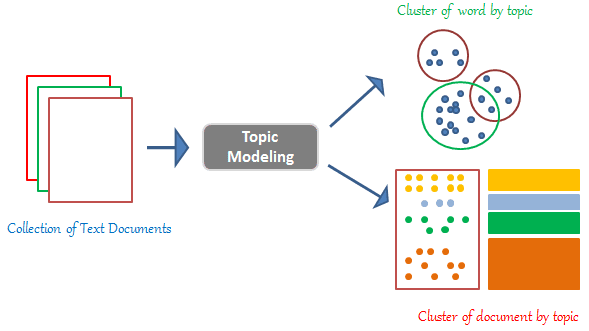

# Importing Libaries and Dependancies

In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import gensim
import wordcloud
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
import shutup; shutup.please()

# Loading the dataset

In [3]:
data = pd.read_csv('Reviews.csv')

In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Basic Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
data.shape

(568454, 10)

In [8]:
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
df = data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary'], axis=1)

In [10]:
df.tail()

,Text
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...
568453,"I am very satisfied ,product is as advertised,..."


Checking what our text input reviws look like, so we get a better idea how to perform text pre-processing and clean them

In [11]:
print(df['Text'][10])

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [12]:
print(df['Text'][2])

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.


# Text Pre-Processing

In [13]:

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from nltk.corpus import wordnet


def clean_text(text, use_lemmatization=True):
    # Remove <br /> tags
    text = text.replace('<br />', ' ')
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-word characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    if use_lemmatization:
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        cleaned_text = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    else:
        # Stemming
        stemmer = PorterStemmer()
        cleaned_text = [stemmer.stem(word) for word in filtered_tokens]
    
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

In [14]:
%%time
df['text_clean'] = df['Text'].apply(clean_text)

Wall time: 16min 17s


In [15]:
print(df['text_clean'])

0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanutsth...
2         confection around century light pillowy citrus...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chickenthis good better resturant...
568450    im disappointed flavor chocolate note especial...
568451    star small give one training session tried tra...
568452    best treat training rewarding dog good groomin...
568453    satisfied product advertised use cereal raw vi...
Name: text_clean, Length: 568454, dtype: object


In [16]:
df.head()

,Text,text_clean
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


# EDA

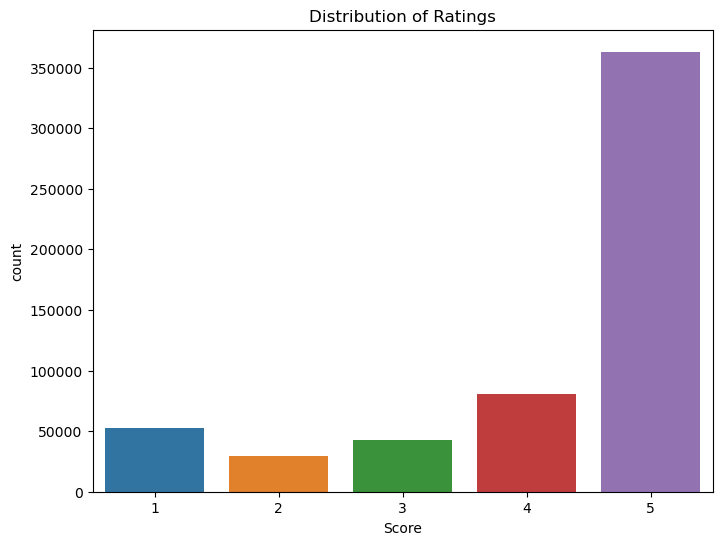

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=data)
plt.title('Distribution of Ratings')
plt.show()


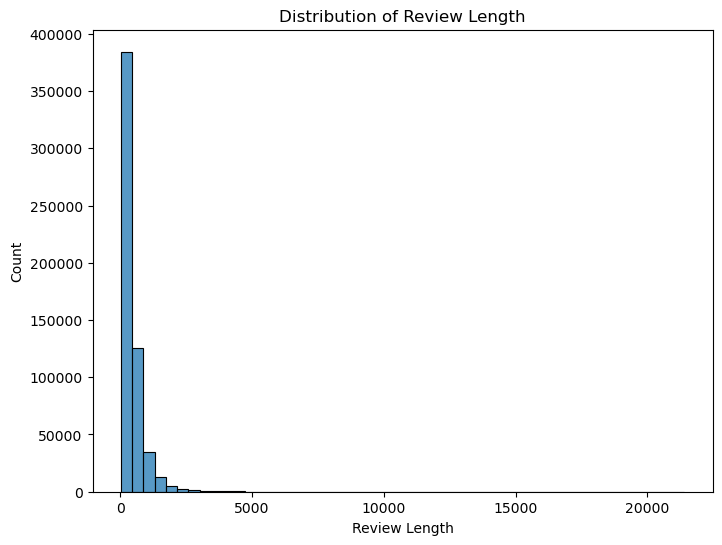

In [18]:
# Distribution of review length

df['Text_Length'] = df['Text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['Text_Length'], bins=50)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


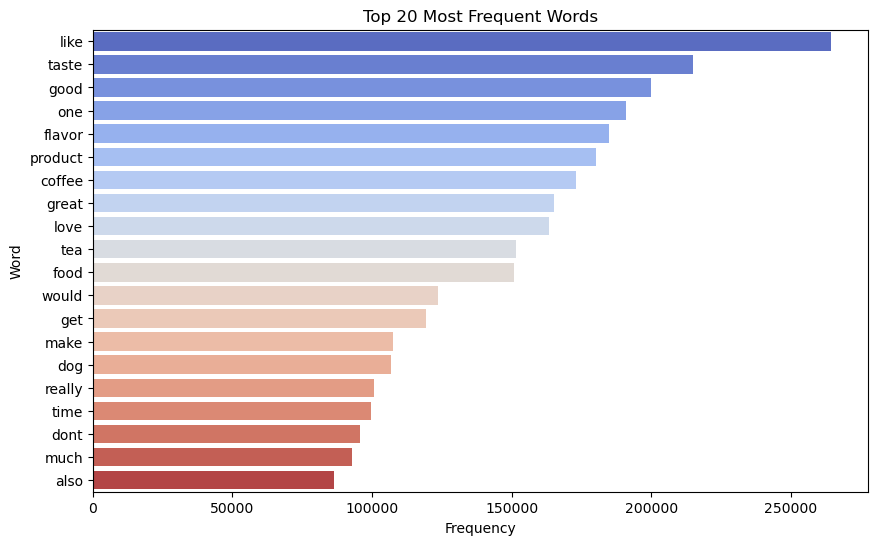

In [19]:
from collections import Counter

# Combine all reviews into a single string
all_reviews = ' '.join(df['text_clean'])

# Tokenize words and count their frequencies
words = all_reviews.split()
word_counts = Counter(words)

# Get the top N frequent words
top_n_words = word_counts.most_common(20)

# Create a colorful bar plot for top N words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in top_n_words], y=[word[0] for word in top_n_words], palette='coolwarm')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

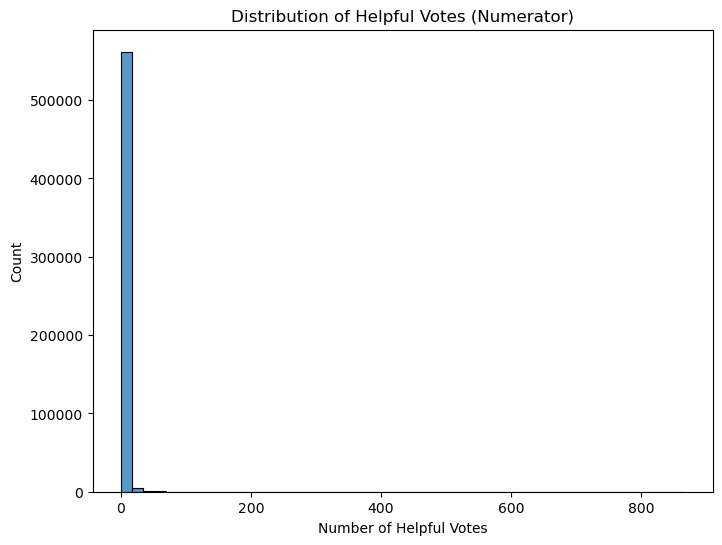

In [20]:
# Distribution of helpful votes
plt.figure(figsize=(8, 6))
sns.histplot(data['HelpfulnessNumerator'], bins=50)
plt.title('Distribution of Helpful Votes (Numerator)')
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Count')
plt.show()


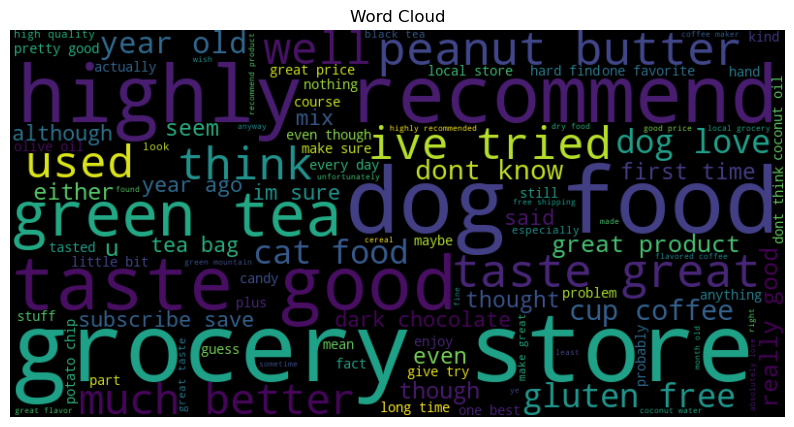

In [21]:
from wordcloud import WordCloud

# Combine all titles into a single string
all_titles = ' '.join(df['text_clean'])

# Generate a word cloud for titles
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', colormap='viridis').generate(all_titles)

# Display the word cloud for titles
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

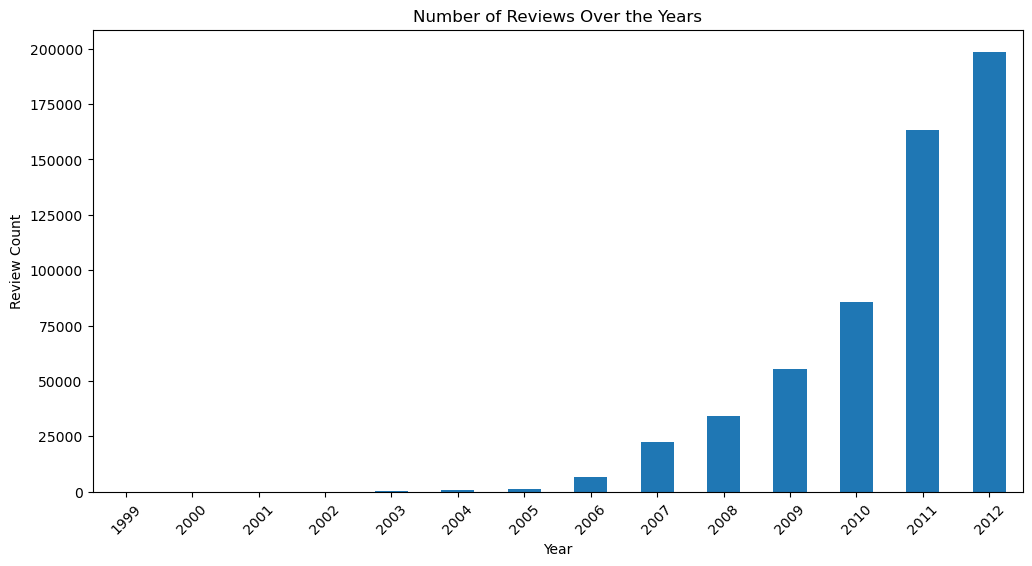

In [22]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')

# Extract the year from the 'Time' column
data['Year'] = data['Time'].dt.year

# Reviews over the years
reviews_over_years = data['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
reviews_over_years.plot(kind='bar')
plt.title('Number of Reviews Over the Years')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()


# TF-IDF

In [23]:
# TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

text_data = df['text_clean']

tfidf_vectorizer = TfidfVectorizer(max_features=10000)  
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Latent Semantic Analysis (LSA) 

LSA works by analyzing the patterns of word usage across a set of documents. It creates a mathematical representation of words and documents and finds relationships between them. Essentially, LSA tries to find hidden, or "latent," topics by looking at how words often appear together in documents. This way, it can group documents and words into topics based on their similarities.

In [24]:
from sklearn.decomposition import TruncatedSVD

num_topics = 10
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

In [25]:
l=lsa_topic_matrix[0]
print("Document 0 :")
for i,topic in enumerate(l):
    print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  17.59241705057725
Topic  1  :  -13.062266874133583
Topic  2  :  -2.5231315904487106
Topic  3  :  7.84272208847062
Topic  4  :  0.9592656460610518
Topic  5  :  5.840763506528789
Topic  6  :  -13.89863852795539
Topic  7  :  -1.57176892045189
Topic  8  :  3.693635568460739
Topic  9  :  14.711944671628585


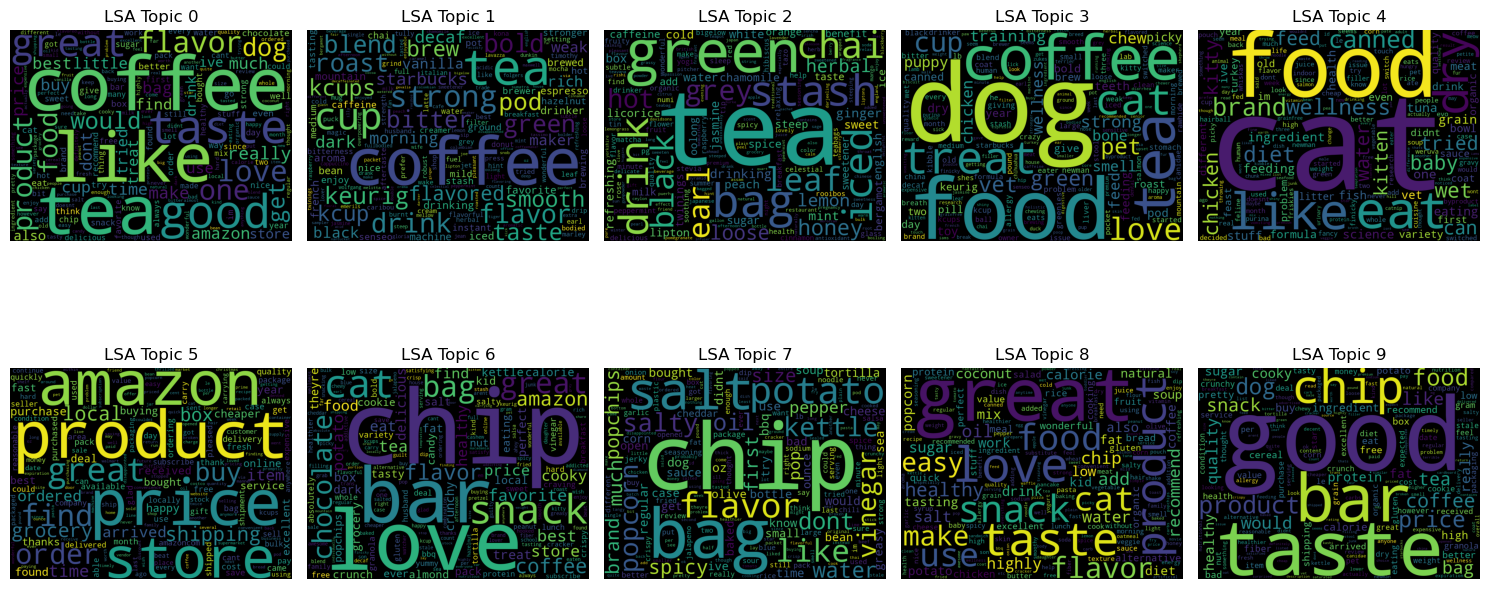

In [26]:
# Create Word Clouds for Top 10 Topics in a grid
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for topic in range(num_topics):
    row_idx = topic // num_cols
    col_idx = topic % num_cols

    ax = axes[row_idx, col_idx]
    
    # Generate word cloud for the topic
    wordcloud = WordCloud(width=800, height=600).fit_words(dict(zip(tfidf_vectorizer.get_feature_names_out(), lsa_model.components_[topic])))
    
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title("LSA Topic " + str(topic))

# Remove empty subplots
for i in range(num_topics, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [27]:
# most important words for each topic
vocab = tfidf_vectorizer.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp) 
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
coffee like tea taste good great flavor love one product 

Topic 1: 
coffee tea cup strong drink flavor bold roast blend green 

Topic 2: 
tea green bag stash drink iced chai leaf black earl 

Topic 3: 
dog food coffee tea treat cat love cup pet vet 

Topic 4: 
cat food eat like dry brand canned diet wellness wet 

Topic 5: 
product price amazon store great find order buy shipping local 

Topic 6: 
chip love bar snack cat great bag chocolate flavor coffee 

Topic 7: 
chip bag salt potato flavor like kettle popcorn vinegar salty 

Topic 8: 
great love taste product snack food cat use flavor make 

Topic 9: 
good taste bar chip product food price dog coffee tea 



# Latent Dirichlet Allocation (LDA)

LDA is another approach to topic modeling. It assumes that there are a fixed number of topics in a collection of documents and that each document is a mixture of these topics. It tries to reverse engineer the process that generated the documents, figuring out which topics are likely to have produced them and what words are associated with each topic. LDA is a probabilistic model, meaning it uses probability distributions to assign words to topics and topics to documents.

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1)


In [29]:
lda_top=lda_model.fit_transform(tfidf_matrix)

In [30]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
    
    print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.9382997583571209 %
Topic  1 :  1.9386374848776589 %
Topic  2 :  50.137318348953606 %
Topic  3 :  1.9390268128096446 %
Topic  4 :  1.9383529133941153 %
Topic  5 :  1.9387190811110344 %
Topic  6 :  34.35418028741858 %
Topic  7 :  1.938286471097106 %
Topic  8 :  1.9388526383812217 %
Topic  9 :  1.9383262035998938 %


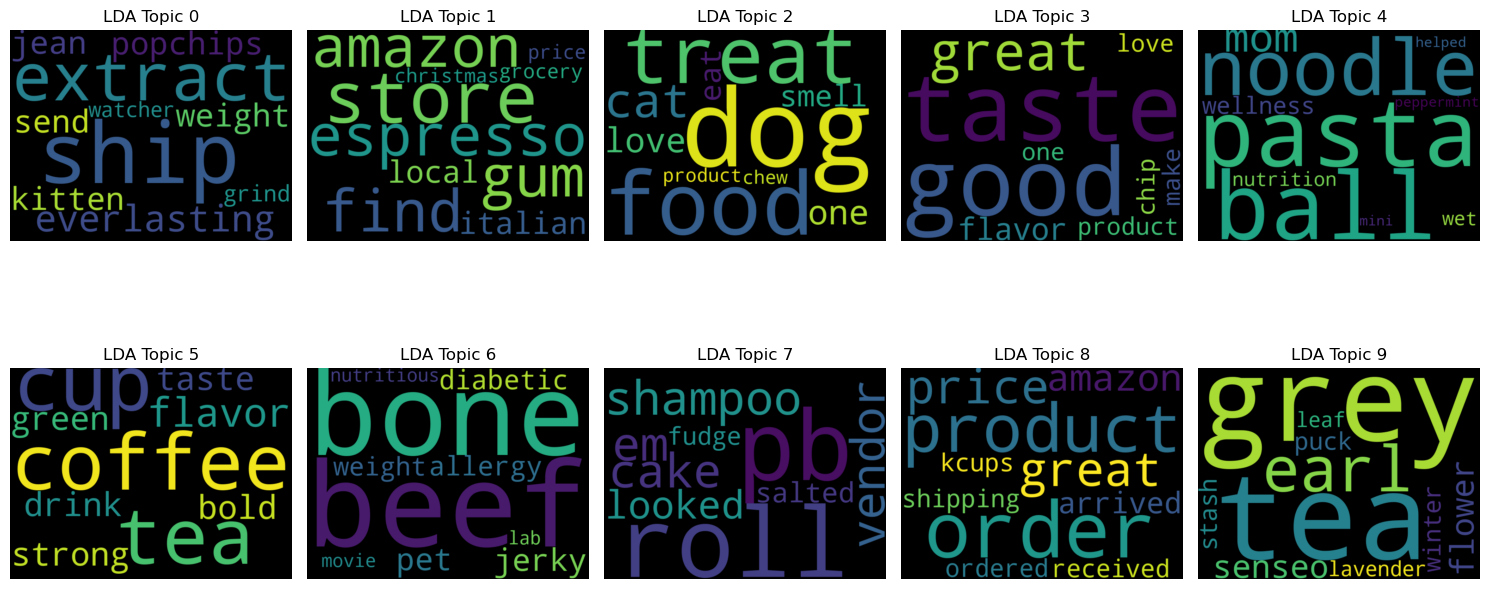

In [31]:
# Create Word Clouds for Top 10 Topics in a grid
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for topic in range(num_topics):
    row_idx = topic // num_cols
    col_idx = topic % num_cols

    ax = axes[row_idx, col_idx]
    
    # Generate word cloud for the topic
    words = lda_model.components_[topic]
    topic_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in words.argsort()[:-11:-1]]  # Get the top 10 words
    wordcloud = WordCloud(width=800, height=600).generate(' '.join(topic_words))
    
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title("LDA Topic " + str(topic))

# Remove empty subplots
for i in range(num_topics, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [32]:
# most important words for each topic
vocab = tfidf_vectorizer.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp) 
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
ship extract everlasting popchips send weight kitten jean grind watcher 

Topic 1: 
store espresso find amazon gum italian local grocery christmas price 

Topic 2: 
dog food treat cat love one smell eat product chew 

Topic 3: 
like taste good great flavor product love one chip make 

Topic 4: 
pasta ball noodle mom wellness nutrition wet peppermint helped mini 

Topic 5: 
coffee tea cup flavor strong taste drink like bold green 

Topic 6: 
beef bone jerky pet allergy diabetic weight nutritious movie lab 

Topic 7: 
pb roll shampoo can vendor cake em looked salted fudge 

Topic 8: 
order product price great amazon arrived shipping ordered received kcups 

Topic 9: 
tea grey earl senseo flower puck winter stash lavender leaf 



In simpler terms, both LSA and LDA are like tools that help us uncover the main subjects or themes in a bunch of documents by analyzing how words are used together. They make it easier to organize and understand large amounts of text data, which can be useful in various applications, such as text classification, content recommendation, and information retrieval.